In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting


In [30]:
'''
B DR: -77.9  +/- 0.17  MHz/ms    Width: 3.2 +/- 0.3 ms
E DR: -59.99 +/- 0.16  MHz/ms    Width: 4.1 +/- 0.3 ms
F DR: -21.09 +/- 0.071 MHz/ms    Width: 8.3 +/- 0.3 ms
G DR: -16.59 +/- 0.051 MHz/ms    Width: 7.3 +/- 0.3 ms
'''

'\nB = -77.9 +/- 0.17 MHz/ms -- 3.2 +/- 0.3 ms\nE = -59.99 +/- 0.16 MHz/ms -- 4.1 +/- 0.3 ms\nF = -21.09 +/- 0.071 MHz/ms -- 8.3 +/- 0.3 ms\nG = -16.59 +/- 0.051 MHz/ms -- 7.3 +/- 0.3 ms\n'

0.24737187500000002
[-1.01155253 -1.12493874 -1.57880753 -1.6829819 ]
Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope             intercept      
    ------------------- --------------------
    -1.6150119304106014 -0.17855135312950196


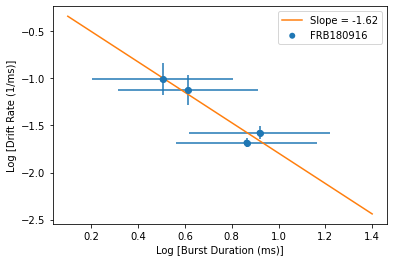

In [106]:
dr = [77.9, 60.0, 21.1, 16.6] #MHz/ms
dr_r = [i / 800 for i in dr]
w = [3.2, 4.1, 8.3, 7.3] #ms

A = []
for i in range(4):
    A.append(dr_r[i] * w[i])
print(np.mean(A))

w = np.log10(w)
dr_r = np.log10(dr_r)
print(dr_r)
yerr = [0.17, 0.16, 0.07, 0.05]
xerr = [0.3, 0.3, 0.3, 0.3]
#yerr = np.log(yerr)
#xerr = np.log(xerr)

fig = plt.figure()
ax = plt.gca()
ax.scatter(w, dr_r, alpha=1, edgecolors='none', label = 'FRB180916')
ax.errorbar(w, dr_r, xerr=xerr,yerr=yerr, fmt='o')
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Log [Burst Duration (ms)]')
ax.set_ylabel('Log [Drift Rate (1/ms)]')
#ax.set_xlabel('[Burst Duration (ms)]')
#ax.set_ylabel('[Drift Rate (1/ms)]')


#logw = np.log10(w)
#logdr_r = np.log10(dr_r)
x = np.linspace(0.1, 1.4, 8)

line_orig = models.Linear1D(slope=-0.08, intercept=0.1)
fit = fitting.LinearLSQFitter()
line_init = models.Linear1D()
fitted_line = fit(line_init, w, dr_r)
plt.plot(x, fitted_line(x), label = 'Slope = -1.62')
#plt.plot(x, fitted_line(x))
print(fitted_line)
#print(np.log(np.abs(fitted_line.slope[0])))
plt.legend()
fig.savefig('Driftvtime.png')